<a href="https://colab.research.google.com/github/bshriselvamkumar/AI-ML-DL-Training/blob/main/Shriselvam_CustomCluster_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
d = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = df.drop('PassengerId', axis=1)

In [ ]:
df = df.drop('Name', axis=1)

In [ ]:
df = df.drop('Sex', axis=1)

In [ ]:
df = df.drop('Ticket', axis=1)

In [ ]:
df = df.drop('Cabin', axis=1)

In [ ]:
df = df.drop('Embarked', axis=1)

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Age,177
SibSp,0
Parch,0
Fare,0


In [ ]:
df = df.drop('Age', axis=1)

In [ ]:
df.isnull().sum()

,0
Survived,0
Pclass,0
SibSp,0
Parch,0
Fare,0


In [ ]:
x = df.iloc[:,0:6].values

In [ ]:
x

array([[ 0.    ,  3.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 0.    ,  3.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    ,  0.    ,  0.    , 30.    ],
       [ 0.    ,  3.    ,  0.    ,  0.    ,  7.75  ]])

In [ ]:
df

,Survived,Pclass,SibSp,Parch,Fare
0,0,3,1,0,7.2500
1,1,1,1,0,71.2833
2,1,3,0,0,7.9250
3,1,1,1,0,53.1000
4,0,3,0,0,8.0500
...,...,...,...,...,...
886,0,2,0,0,13.0000
887,1,1,0,0,30.0000
888,0,3,1,2,23.4500
889,1,1,0,0,30.0000


In [ ]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

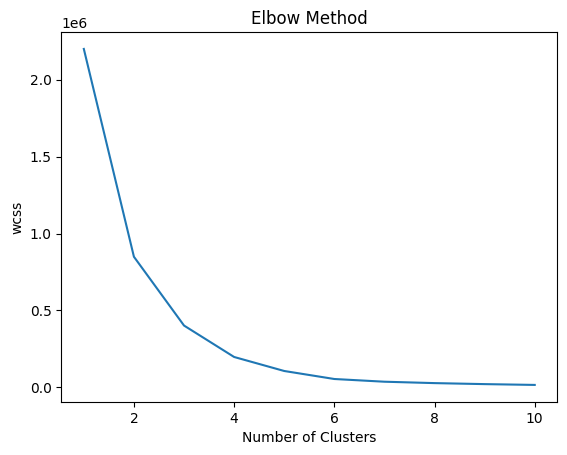

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
model2 = DBSCAN(eps=0.3, min_samples=10)

In [ ]:
model2.fit(x)

DBSCAN(eps=0.3, min_samples=10)

In [ ]:
label = model2.labels_

In [ ]:
label

array([-1, -1,  0, -1,  1,  1, -1, -1, -1, -1, -1,  2,  1, -1,  1, -1, -1,
        3, -1,  0, -1,  3,  0, -1, -1, -1,  1, -1,  0,  1, -1, -1,  0,  4,
       -1, -1,  0,  1, -1, -1, -1, -1,  1, -1,  0,  1, -1,  0, -1, -1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1,  4, -1, -1, -1, -1,  1,  1,  1, -1, -1,  1, -1,  0, -1, -1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1, -1, -1,  1,  1,
       -1,  1, -1,  1,  0,  0,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
       -1, -1,  1, -1,  3, -1, -1,  1,  0, -1,  1,  1,  1, -1, -1,  5, -1,
       -1, -1,  6, -1, -1,  0, -1,  1, -1, -1,  0, -1, -1,  5, -1, -1,  1,
       -1,  1, -1,  0,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1, -1, -1,
        2, -1,  1,  3,  5, -1, -1, -1, -1,  1, -1,  0,  5,  6, -1,  1,  1,
        0, -1, -1, -1,  0, -1,  1, -1,  1,  5, -1, -1,  0, -1, -1,  4,  0,
        5,  1,  1, -1,  6

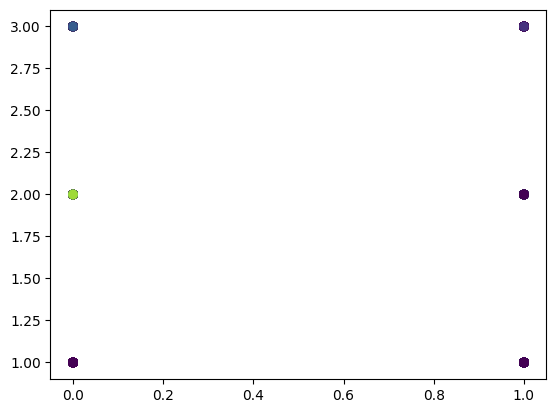

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=label)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
model3 = AgglomerativeClustering(n_clusters=5)

In [ ]:
model3.fit(x)

AgglomerativeClustering(n_clusters=5)

In [ ]:
label = model3.labels_

In [ ]:
label

array([0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       4, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 3, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 4, 0,

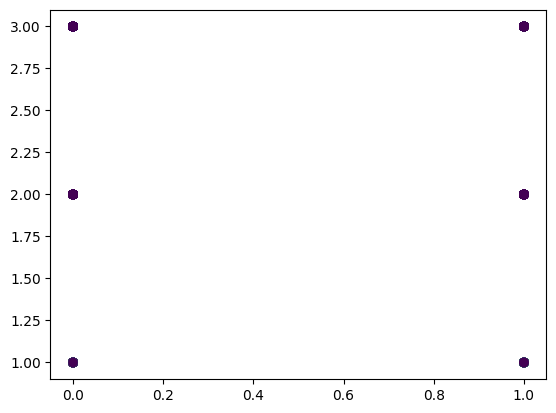

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=label)

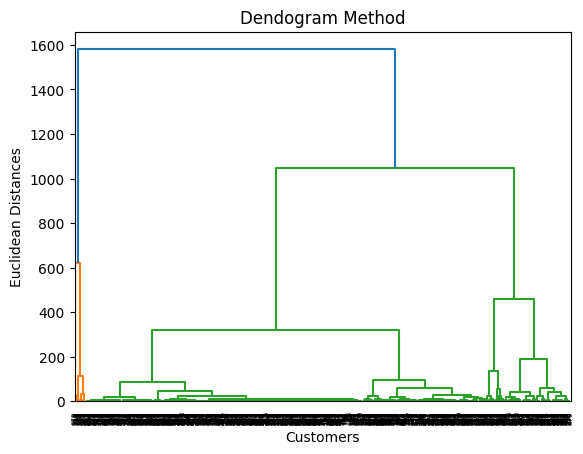

In [ ]:
import scipy.cluster.hierarchy as sch
d_gram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendogram Method')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
#plt.savefig('img_1.png', dpi=500)
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [ ]:
sh_score = silhouette_score(x, label)

In [ ]:
sh_score

0.7514303213944865

In [ ]:
ch = calinski_harabasz_score(x, label) #distance metrices

In [ ]:
ch

4330.550680280583

In [ ]:
d = davies_bouldin_score(x, label)

In [ ]:
d

0.3462892806095891

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 2)

# Define the Minkowski distance metric
def minkowski_distance(X, Y, p):
    return pairwise_distances(X, Y, metric='minkowski', p=p)

# Create a KMeans model with Minkowski distance metric
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10)

# Define a custom distance metric for KMeans
kmeans.distance_metric = lambda X, Y: minkowski_distance(X, Y, p=3)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

print("Cluster labels:", labels)
print("Cluster centers:", centers)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# Generate some sample data
np.random.seed(0)
X = np.random.rand(100, 2)

# Define the Minkowski distance metric
def minkowski_distance(X, Y, p):
    return pairwise_distances(X, Y, metric='minkowski', p=p)

# Create a KMeans model with Minkowski distance metric
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10)

# Define a custom distance metric for KMeans
kmeans.distance_metric = lambda X, Y: minkowski_distance(X, Y, p=3)

# Fit the KMeans model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Get the cluster centers
centers = kmeans.cluster_centers_

print("Cluster labels:", labels)
print("Cluster centers:", centers)